**Step 0:** Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Step 1:** Load and Preprocess Data

1.Load dataset

In [9]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 26.5MB/s]


In [10]:
df = pd.read_csv("Groceries.csv")
print(df.head())
print(df.info())


   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 no

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Features (X) and target (y)
X = df.drop("class", axis=1).values
y = df["class"].values

# Scale features (important for KNN distance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Data preprocessed successfully ✅")


Data preprocessed successfully ✅


**Step 2:** Scratch KNN Implementation

In [14]:
from collections import Counter
import numpy as np

# Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3, verbose=False):
        self.k = k
        self.verbose = verbose   # if True → show details

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Step 1: compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Step 2: get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Step 3: majority vote
        most_common = Counter(k_nearest_labels).most_common(1)

        if self.verbose:
            print("\n--- Nearest Neighbors ---")
            for idx in k_indices:
                print(f"Label={self.y_train[idx]}, Distance={distances[idx]:.4f}")
            print("\n--- Majority Voting ---")
            print(Counter(k_nearest_labels))  # shows counts per label
            print(f"Predicted Label = {most_common[0][0]}")

        return most_common[0][0]


In [15]:
# Train with verbose ON
knn = KNN(k=5, verbose=True)
knn.fit(X_train, y_train)

# Predict only one sample (to see voting clearly)
print("Test Sample:", X_test[0])
pred = knn._predict(X_test[0])   # direct call to show details

# Predict whole test set (no details shown, just accuracy)
knn.verbose = False
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("\nScratch KNN Accuracy:", accuracy)


Test Sample: [-1.99534212 -0.48217545  2.40515039  0.60551055  1.46068136 -0.43076575
  0.74945151]

--- Nearest Neighbors ---
Label=2, Distance=1.7012
Label=3, Distance=2.6418
Label=2, Distance=2.7241
Label=2, Distance=2.7598
Label=2, Distance=2.7697

--- Majority Voting ---
Counter({np.int64(2): 4, np.int64(3): 1})
Predicted Label = 2

Scratch KNN Accuracy: 0.8636363636363636


In [21]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Scratch KNN prediction function
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i, x_train in enumerate(X_train):
        dist = euclidean_distance(x_test, x_train)
        distances.append((dist, y_train[i]))

    # Sort distances
    distances.sort(key=lambda x: x[0])

    # Top-k neighbors
    neighbors = [label for _, label in distances[:k]]

    # Majority voting
    most_common = Counter(neighbors).most_common(1)[0][0]
    return most_common

# Function to evaluate accuracy for different K values
def evaluate_knn(X_train, y_train, X_test, y_test, k):
    predictions = []
    for x in X_test:
        predictions.append(knn_predict(X_train, y_train, x, k))
    return accuracy_score(y_test, predictions)

# Test multiple K values
k_range = range(1, 21)
accuracies = []

for k in k_range:
    acc = evaluate_knn(X_train, y_train, X_test, y_test, k)
    accuracies.append(acc)

# Find optimal K
optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"✅ Optimal K (Scratch): {optimal_k}")
print(f"✅ Best Accuracy (Scratch): {max(accuracies):.2f}")

# Final prediction with optimal K
final_predictions = [knn_predict(X_train, y_train, x, optimal_k) for x in X_test]
print("Predictions with Optimal K (Scratch):", final_predictions[:10])  # show first 10 predictions


✅ Optimal K (Scratch): 13
✅ Best Accuracy (Scratch): 0.90
Predictions with Optimal K (Scratch): [np.int64(2), np.int64(3), np.int64(2), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(2), np.int64(3), np.int64(3)]


**Step 3:** Sklearn KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np

# Train sklearn KNN
knn_sklearn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

print("Sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sklearn))

# ---- Show neighbors + voting for 1 test sample ----
test_sample = X_test[0].reshape(1, -1)

# Find k nearest neighbors using sklearn's kneighbors()
distances, indices = knn_sklearn.kneighbors(test_sample)

print("\n--- Nearest Neighbors (Sklearn) ---")
neighbor_labels = []
for i, (dist, idx) in enumerate(zip(distances[0], indices[0]), start=1):
    label = y_train[idx]
    neighbor_labels.append(label)
    print(f"{i}. Label={label}, Distance={dist:.4f}, Row={X_train[idx]}")

print("\n--- Majority Voting ---")
print(Counter(neighbor_labels))
print(f"Predicted Label = {y_pred_sklearn[0]}")


Sklearn KNN Accuracy: 0.8636363636363636

--- Nearest Neighbors (Sklearn) ---
1. Label=2, Distance=1.7012, Row=[-1.99534212 -0.12833882  1.65162206 -0.33745855  0.33285566 -0.28021246
  0.61774642]
2. Label=3, Distance=2.6418, Row=[-1.99534212 -0.07348227  0.02614412 -0.24612192  1.08247103 -0.40451867
  0.21730614]
3. Label=2, Distance=2.7241, Row=[-0.70233692 -0.83284576  1.24603256  0.41851802 -0.4969799   0.2119729
  0.70401148]
4. Label=2, Distance=2.7598, Row=[-1.99534212  1.0451006   0.77194048  0.16210122  0.41101363 -0.54541303
  1.8918423 ]
5. Label=2, Distance=2.7697, Row=[-1.99534212 -0.72780298  0.67400214  0.79924535 -0.35015015  0.61869775
  0.3064112 ]

--- Majority Voting ---
Counter({np.int64(2): 4, np.int64(3): 1})
Predicted Label = 2


✅ Optimal K value: 11
✅ Best Accuracy: 0.90
Predictions with Optimal K: [2 3 2 1 3 3 3 2 3 3 3 1 2 3 2 3 1 2 1 3 2 2 2 3 1 1 1 1 1 3 2 2 1 2 1 3 3
 2 2 3 3 3 3 3 2 1 2 2 2 1 2 3 3 1 2 3 2 3 2 2 1 3 2 2 2 2 2 2 3 1 2 3 3 3
 3 2 2 1 2 3 3 3 1 2 3 2 3 3]


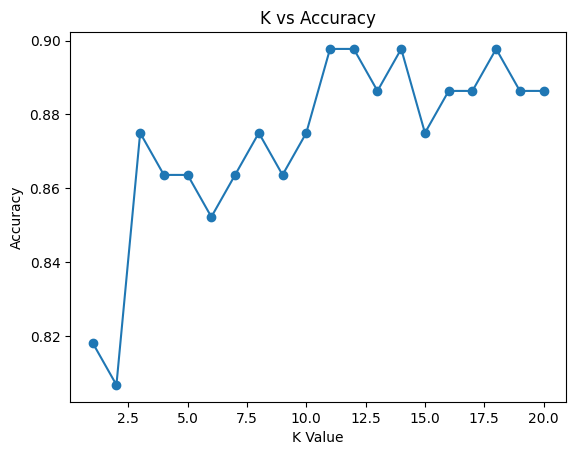

In [20]:
# -----------------------------
# STEP 3: KNN with Sklearn
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal K
k_range = range(1, 21)  # test K from 1 to 20
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Best K value
optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"✅ Optimal K value: {optimal_k}")
print(f"✅ Best Accuracy: {max(accuracies):.2f}")

# Train final model with optimal K
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

print("Predictions with Optimal K:", y_pred_final)

# Optional: Plot accuracy vs K
plt.plot(k_range, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()
